In [4]:
pip install pandas matplotlib seaborn

112.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 7.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.1 MB/s eta 0:00:00a 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


Dataset Shape: (20000, 11)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment_Date          20000 non-null  datetime64[ns]
 4   Planned_Delivery_Date  20000 non-null  datetime64[ns]
 5   Actual_Delivery_Date   20000 non-null  datetime64[ns]
 6   Vehicle_Type           19403 non-null  object        
 7   Distance               20000 non-null  int64         
 8   Weather_Conditions     20000 non-null  object        
 9   Traffic_Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB
None

Missing Va

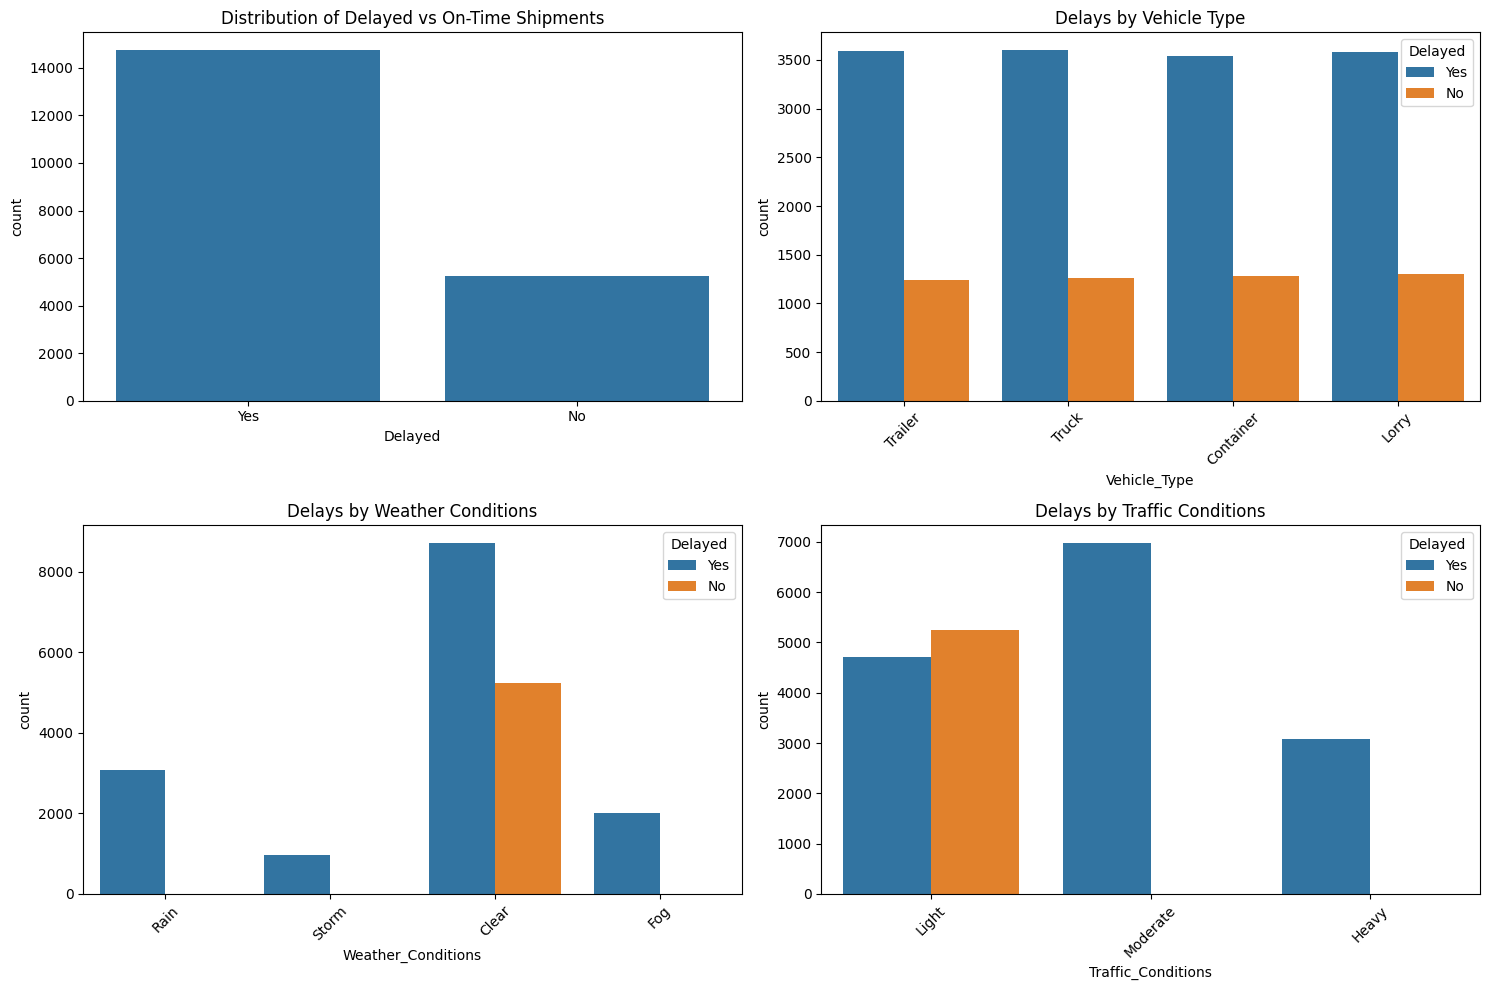


Delay Rate by Vehicle Type:
Vehicle_Type  Delayed
Container     Yes        0.733789
              No         0.266211
Lorry         Yes        0.733702
              No         0.266298
Trailer       Yes        0.742869
              No         0.257131
Truck         Yes        0.741564
              No         0.258436
Name: proportion, dtype: float64

Average Distance by Delay Status:
Delayed
No     1100.764257
Yes    1101.983330
Name: Distance, dtype: float64

Top 5 Routes with Highest Delay Rate:
                     Total_Shipments  Delay_Rate
Origin  Destination                             
Jaipur  Lucknow                  211    0.819905
Pune    Bangalore                205    0.809756
Chennai Hyderabad                226    0.805310
Jaipur  Ahmedabad                192    0.796875
Lucknow Delhi                    235    0.795745


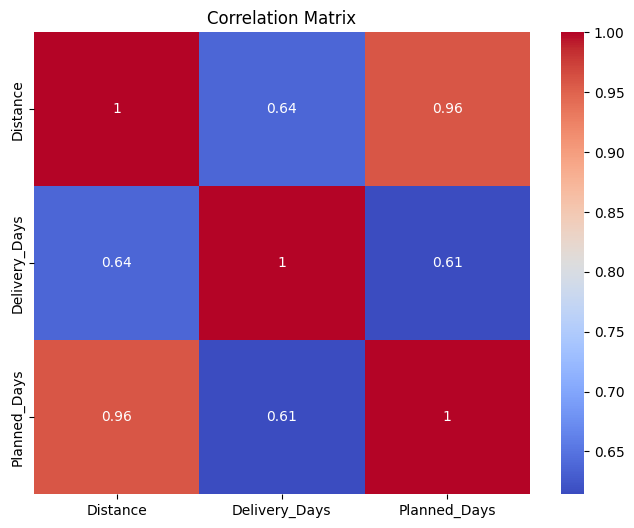

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data from an Excel file
df = pd.read_excel('../data/shipment_data.xlsx')  # Adjust filename as needed

# 1. Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Convert date columns to datetime
date_columns = ['Shipment_Date', 'Planned_Delivery_Date', 'Actual_Delivery_Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# 3. Create derived features
df['Delivery_Days'] = (df['Actual_Delivery_Date'] - df['Shipment_Date']).dt.days
df['Planned_Days'] = (df['Planned_Delivery_Date'] - df['Shipment_Date']).dt.days

# 4. Visualizations
plt.figure(figsize=(15, 10))

# 4.1 Delay Distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Delayed')
plt.title('Distribution of Delayed vs On-Time Shipments')

# 4.2 Vehicle Type Analysis
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Vehicle_Type', hue='Delayed')
plt.title('Delays by Vehicle Type')
plt.xticks(rotation=45)

# 4.3 Weather Impact
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Weather_Conditions', hue='Delayed')
plt.title('Delays by Weather Conditions')
plt.xticks(rotation=45)

# 4.4 Traffic Impact
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Traffic_Conditions', hue='Delayed')
plt.title('Delays by Traffic Conditions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. Statistical Analysis
print("\nDelay Rate by Vehicle Type:")
print(df.groupby('Vehicle_Type')['Delayed'].value_counts(normalize=True))

print("\nAverage Distance by Delay Status:")
print(df.groupby('Delayed')['Distance'].mean())

# 6. Popular Routes Analysis
print("\nTop 5 Routes with Highest Delay Rate:")
route_delays = df.groupby(['Origin', 'Destination'])['Delayed'].agg(['count', lambda x: (x == 'Yes').mean()])
route_delays.columns = ['Total_Shipments', 'Delay_Rate']
print(route_delays.sort_values('Delay_Rate', ascending=False).head())

# 7. Correlation Analysis for Numerical Features
numerical_cols = ['Distance', 'Delivery_Days', 'Planned_Days']
correlation = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()